In [2]:
import torch
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

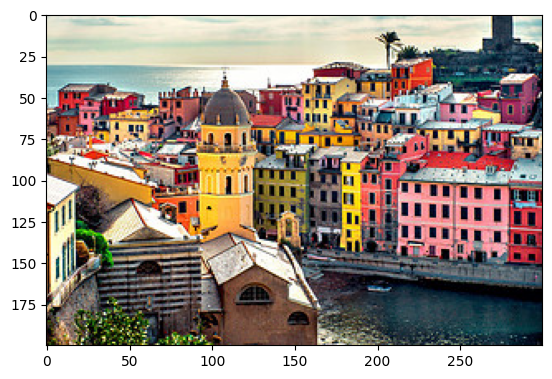

torch.Size([1, 200, 300, 3])


In [3]:
img = cv.imread("4.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


img_rgb = np.array(img_rgb)
x = torch.from_numpy(img_rgb).float().unsqueeze(dim=0)

# 别忘了看tensor形状！！！
print(x.shape)

(200, 300, 3)


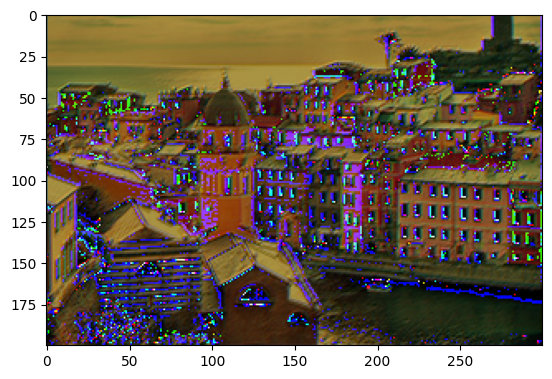

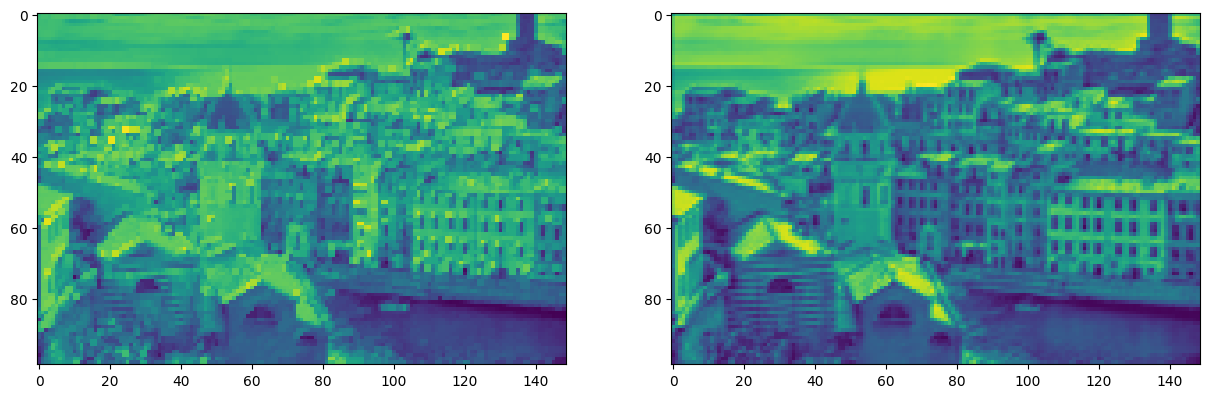

In [4]:
# 先卷一下
conv = torch.nn.Conv3d(in_channels=1, out_channels=1, kernel_size=(3,3,3), stride=1, padding='same')
x = conv(x)

print(x.detach().numpy().squeeze().shape)

# 原图颜色强度是一个浮点数，matplotlib 期望它的范围从 0 到 1，使用‘uint8’转换
plt.imshow(x.detach().numpy().squeeze().astype('uint8'))
plt.show()

# 当然可以pool1d or pool2d
pooling_3d = torch.nn.MaxPool3d(kernel_size=(3,3,3), stride=2, padding=0)

pooling_mean = torch.nn.AvgPool3d(kernel_size=(3,3,3), stride=2, padding=0)

max_pool_x = pooling_3d(x)

mean_pool_x = pooling_mean(x)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(max_pool_x.detach().numpy().squeeze())
axes[1].imshow(mean_pool_x.detach().numpy().squeeze())
plt.show()

**maxPooling一定不好吗？**

**meanPooling一定好吗？**

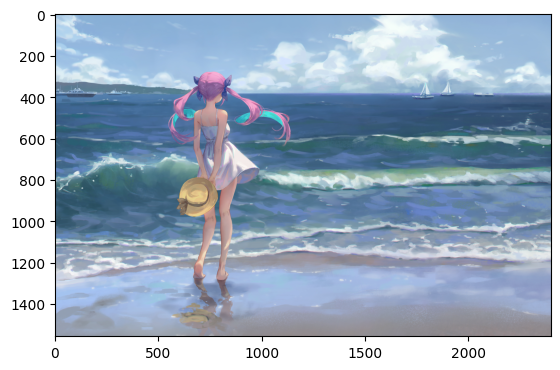

torch.Size([1, 1557, 2400, 3])


In [6]:
img_f = cv.imread("5.jpg")
img_rgb_f = cv.cvtColor(img_f, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb_f)
plt.show()


img_rgb_f = np.array(img_rgb_f)
y = torch.from_numpy(img_rgb_f).float().unsqueeze(dim=0)

# 别忘了看tensor形状！！！
print(y.shape)

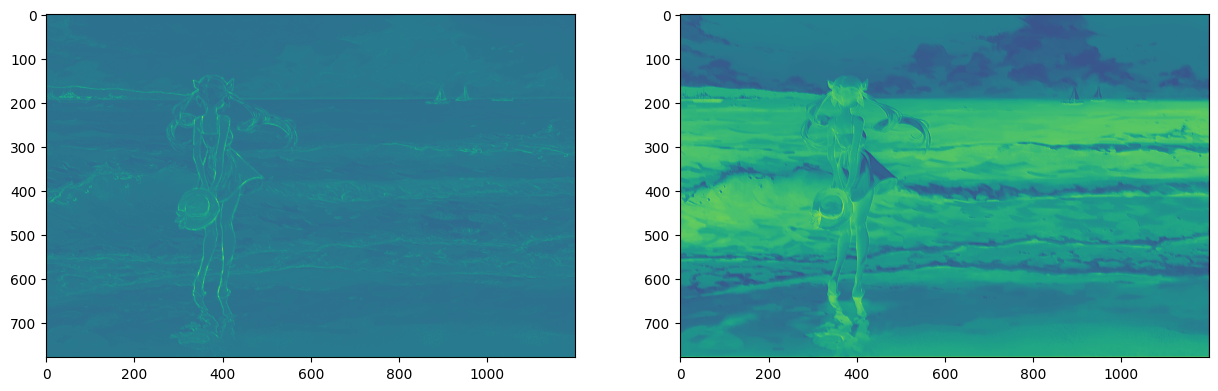

In [7]:
conv = torch.nn.Conv3d(in_channels=1, out_channels=1, kernel_size=(7,7,3), stride=1, padding='same')
y = conv(y)

pooling_3d = torch.nn.MaxPool3d(kernel_size=(3,3,3), stride=2, padding=0)

pooling_mean = torch.nn.AvgPool3d(kernel_size=(3,3,3), stride=2, padding=0)

max_pool_y = pooling_3d(y)

mean_pool_y = pooling_mean(y)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(max_pool_y.detach().numpy().squeeze())
axes[1].imshow(mean_pool_y.detach().numpy().squeeze())
plt.show()

**结论**
1.maxpooling保留图像边缘轮廓信息

2.meanpooling保留较多图片背景信息

3.选pooling要根据特征和目的！
    + 比如我们在做人像识别，重点在识别出人，那么我们可以选择maxpooling
    + 如果我们想识别照片中的人在某个特定场景，那么使用meanpooling也是个不错的选择

4.pooling的主要作用一方面是去掉冗余信息，一方面要保留feature map的特征信息。
在分类问题中，我们需要知道的是这张图像有什么object，而不大关心这个object位置在哪，在这种情况下显然max pooling比average pooling更合适。在网络比较深的地方，特征已经稀疏了，从一块区域里选出最大的，比起这片区域的平均值来，更能把稀疏的特征传递下去。（转载：https://blog.csdn.net/ytusdc/article/details/104415261）

In [3]:
# 线性层

input = torch.rand(2, 3)
print(input)

tensor([[0.2586, 0.7529, 0.5814],
        [0.1964, 0.0943, 0.2590]])


In [4]:
m = torch.nn.Linear(in_features=3, out_features=5)
output = m(input)

print(output.shape)
print(output)

torch.Size([2, 5])
tensor([[ 0.1446, -0.2877,  0.0844, -1.1033,  0.2952],
        [ 0.1322, -0.2804,  0.0090, -0.6701,  0.0018]],
       grad_fn=<AddmmBackward0>)
